In [1]:
import numpy as np
import pandas as pd
import sklearn

In [2]:
#  https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data
df = pd.read_csv('../sample_data_from_machine_learning_databases/agaricus-lepiota.data')

In [3]:
# データの列にラベルを設定
df.columns =['classes','cap_shape','cap_surface','cap_color','odor','bruises','gill_attachment','gill_spacing','gill_size','gill_color','stalk_shape','stalk_root','stalk_surface_above_ring','stalk_surface_below_ring','stalk_color_above_ring','stalk_color_below_ring','veil_type','veil_color','ring_number','ring_type','spore_print_color','population','habitat']

df.head()

,classes,cap_shape,cap_surface,cap_color,odor,bruises,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [4]:
# 今回利用するのは、説明簡略化のため4つの指標を使う
# 決定木は、テキストの特徴量は利用できないので、pandas.get_dummies()を使って、数値に変換する
df_dummy = pd.get_dummies(df[['gill_color','gill_attachment','odor','cap_color']])
df_dummy.head()

,gill_color_b,gill_color_e,gill_color_g,gill_color_h,gill_color_k,gill_color_n,gill_color_o,gill_color_p,gill_color_r,gill_color_u,...,cap_color_b,cap_color_c,cap_color_e,cap_color_g,cap_color_n,cap_color_p,cap_color_r,cap_color_u,cap_color_w,cap_color_y
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [23]:
# 今回は、このきのこデータが毒キノコかどうかというのを判断するものとする
df_dummy['flg'] = df['classes'].map(lambda clazz: 1 if clazz =='p' else 0)

,gill_color_b,gill_color_e,gill_color_g,gill_color_h,gill_color_k,gill_color_n,gill_color_o,gill_color_p,gill_color_r,gill_color_u,...,cap_color_c,cap_color_e,cap_color_g,cap_color_n,cap_color_p,cap_color_r,cap_color_u,cap_color_w,cap_color_y,flg
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [7]:
# データ分割
x = df_dummy.drop('flg', axis=1)
y = df_dummy['flg']
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0)

# 決定木クラスの初期化と学習
model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [19]:
x_train.head()

,gill_color_b,gill_color_e,gill_color_g,gill_color_h,gill_color_k,gill_color_n,gill_color_o,gill_color_p,gill_color_r,gill_color_u,...,cap_color_b,cap_color_c,cap_color_e,cap_color_g,cap_color_n,cap_color_p,cap_color_r,cap_color_u,cap_color_w,cap_color_y
5832,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
601,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1601,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4941,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7492,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [8]:
'正解率(train):{:.3f}'.format(model.score(x_train, y_train))

'正解率(train):0.879'

In [9]:
'正解率(test):{:.3f}'.format(model.score(x_test, y_test))

'正解率(test):0.884'

In [10]:
from sklearn import tree
import pydotplus
from sklearn.externals.six import StringIO
from IPython.display import Image

/Users/m1049/.pyenv/versions/anaconda3-5.3.1/envs/jupyter_training/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


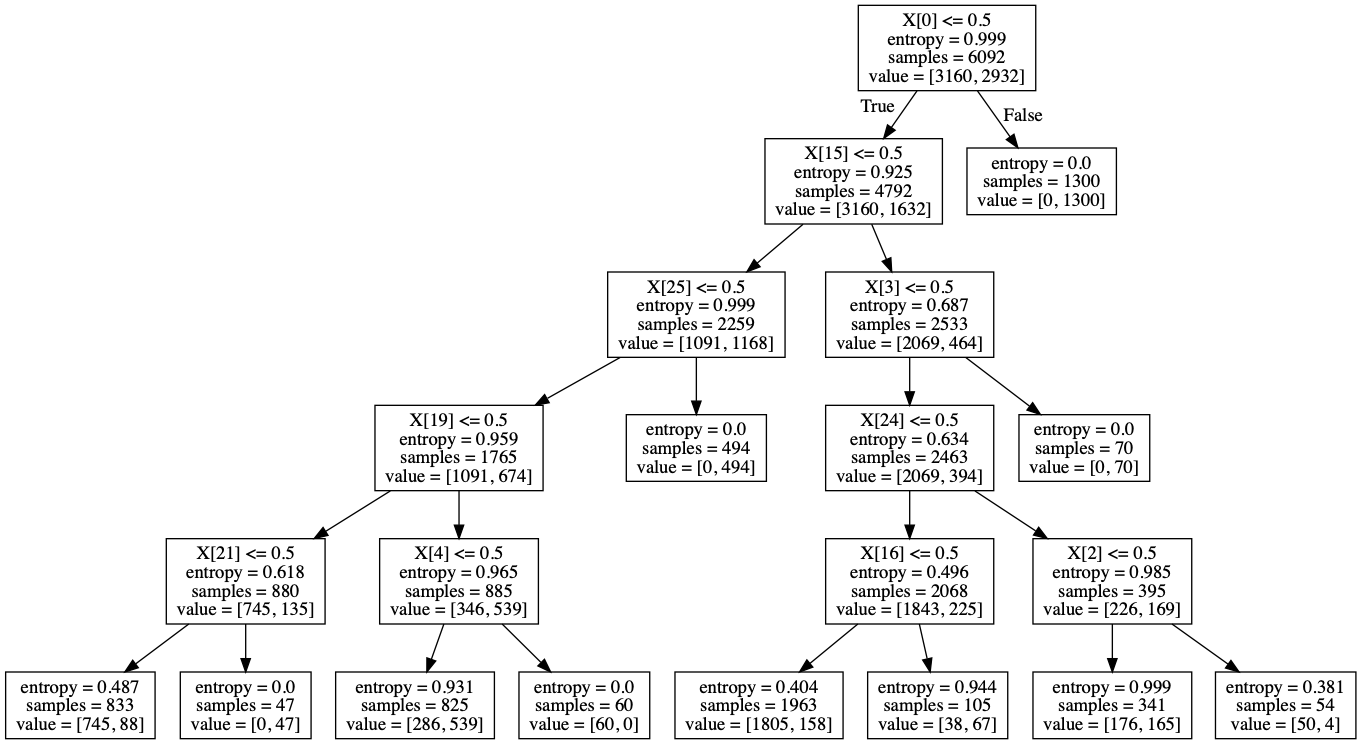

In [11]:
dot_data = StringIO()
tree.export_graphviz(model, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())